In [123]:
using Images, VideoIO, Random, Distributions

In [ ]:
function cross_entropy_method(objective_function, dim, max_iter=700, sample_size=200, elite_fraction=0.1)
    # Инициализация начального распределения
    vmean = zeros(dim)
    vstd_dev = ones(dim)
    g_best_value = 1000000000
    g_best_sample = randn(dim) .* vstd_dev .+ vmean
    hist = []
    for iter in 1:max_iter
        # Генерация выборки
        samples = [randn(dim) .* vstd_dev .+ vmean for _ in 1:sample_size]
        # Вычисление значений целевой функции
        values = [objective_function(sample) for sample in samples]
        # Выбор элитных образцов
        elite_samples = samples[sortperm(values)[1:floor(Int, sample_size * elite_fraction)]]

        matrix = hcat(elite_samples...)'
        # Обновление параметров распределения
        vmean = vec(mean(matrix, dims=1))
        vstd_dev = vec(std(matrix, dims=1))
        # Вывод текущего лучшего решения
        best_value = minimum(values)
        best_sample = samples[argmin(values)]
        if g_best_value > best_value
            g_best_value = best_value
            g_best_sample = best_sample
        end
        push!(hist, best_sample)
        println("Iteration $iter: Best value = $best_value,")
    end

    return g_best_sample, hist
end

cross_entropy_method (generic function with 4 methods)

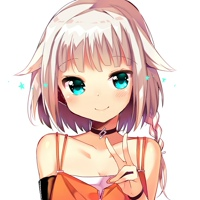

In [125]:
img = load("t3.jpg")

# Преобразование изображения в массив
img_array = float.(permutedims(channelview(img), (2, 3, 1)))


# Разделение на каналы
r = img_array[:, :, 1]
g = img_array[:, :, 2]
b = img_array[:, :, 3]
n = size(img_array)[1]
img = zeros(RGB{Float32}, n, n)
matrix = r
for i in 1:n
    for j in 1:n
        img[i,j] = RGB(r[i,j], g[i,j], b[i,j])
    end
end
display(img)


In [126]:
function objective_function(x)
    v = vec(r')
    return (sum([abs(v[i]-x[i]) for i in 1:length(v)]))/length(v)
end
rgen_image, rhist = cross_entropy_method(objective_function, length(vec(r)))
rhist = rhist[1:50:end]
function objective_function1(x)
    v = vec(g')
    return (sum([abs(v[i]-x[i]) for i in 1:length(v)]))/length(v)
end
ggen_image, ghist = cross_entropy_method(objective_function1, length(vec(g)))
ghist = ghist[1:50:end]
function objective_function2(x)
    v = vec(b')
    return (sum([abs(v[i]-x[i]) for i in 1:length(v)]))/length(v)
end
bgen_image, bhist = cross_entropy_method(objective_function2, length(vec(b)))
bhist = bhist[1:50:end]

Iteration 1: Best value = 1.1048698657441534,
Iteration 2: Best value = 1.1069720087156085,
Iteration 3: Best value = 1.1050455790918225,
Iteration 4: Best value = 1.107015548755832,
Iteration 5: Best value = 1.1053777848044384,
Iteration 6: Best value = 1.1074481861843457,
Iteration 7: Best value = 1.1057402259676905,
Iteration 8: Best value = 1.1062548053668482,
Iteration 9: Best value = 1.1051208904607608,
Iteration 10: Best value = 1.106317295087931,
Iteration 11: Best value = 1.1028227437347908,
Iteration 12: Best value = 1.1015933352077931,
Iteration 13: Best value = 1.1028297397824458,
Iteration 14: Best value = 1.1034675880214035,
Iteration 15: Best value = 1.101420749986457,
Iteration 16: Best value = 1.0991577235661378,
Iteration 17: Best value = 1.0972400662003798,
Iteration 18: Best value = 1.09791026052353,
Iteration 19: Best value = 1.0968707714630588,
Iteration 20: Best value = 1.096904662264995,
Iteration 21: Best value = 1.0958954999400095,
Iteration 22: Best value = 1

14-element Vector{Any}:
 [-1.2008216816900306, 1.0566862477280206, -0.2750708330433836, -0.9405598086829599, 0.437688611248435, 0.46702896086157425, -1.3790737102771715, 0.44220230293412977, 0.9187267393190867, -0.3428913416513326  …  1.6818992353141513, -0.45785410017577444, -0.9674597121720762, 0.029322302419335373, -0.07544405619205892, 0.5283617209144458, 0.22010534278380683, -0.09163901766830433, 0.8386311325025768, 1.634733589954297]
 [1.2337963836195915, 0.09288449634708681, 1.1072058654132944, -0.6550834779055146, -1.171535801883068, 0.021256923392535043, -2.0815641172682318, 1.6188044034728408, -0.08578356501711071, -2.2741144414290355  …  1.0329543689152543, 0.048117585833102695, 0.8754673117503566, 0.7902924627803318, 1.719201202356392, -1.978793232026812, 1.683607954255352, -0.2761179097829901, 0.10466226915250358, 1.4590799785501076]
 [0.9111564533379688, 0.19917563271596364, 0.02219270246929675, 0.22300905303550445, -1.3859252253165895, -0.1675600570575194, -0.96342718288

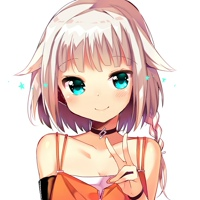

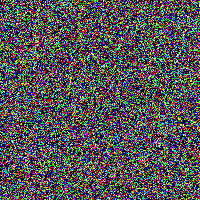

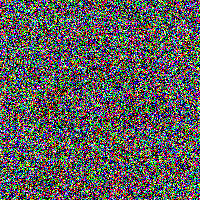

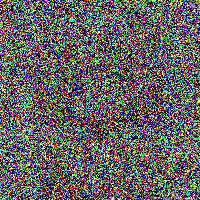

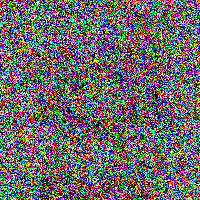

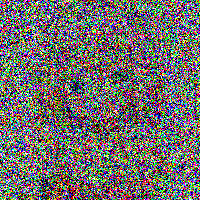

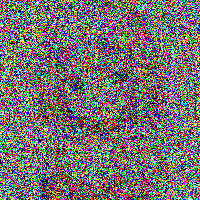

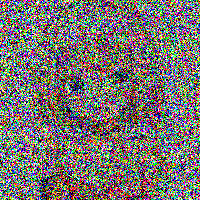

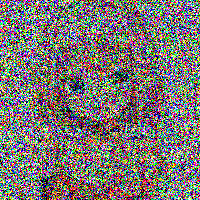

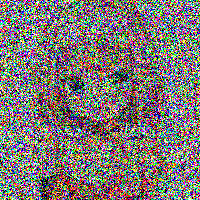

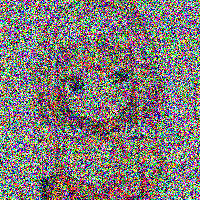

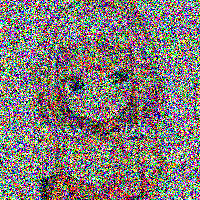

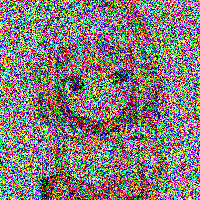

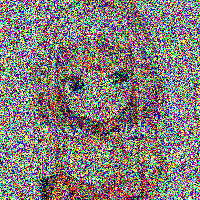

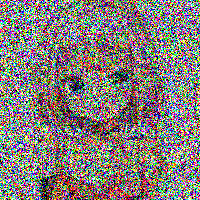

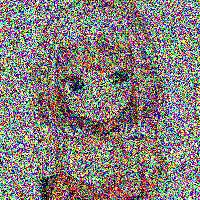

In [127]:
push!(rhist, rgen_image)
push!(ghist, ggen_image)
push!(bhist, bgen_image)
display(img)
for i in 1:length(rhist)
    img = zeros(RGB{Float32}, n, n)
    r = Gray.(reshape(rhist[i], n, n))
    g = Gray.(reshape(ghist[i], n, n))
    b = Gray.(reshape(bhist[i], n, n))
    for i in 1:n
        for j in 1:n
            img[j,i] = RGB(r[i,j], g[i,j], b[i,j])
        end
    end
    display(img)
end